<a href="https://colab.research.google.com/github/Heisnotanimposter/ObjectDetection_with_Server/blob/main/PersonSpeedvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!nvidia-smi

Wed Aug 14 05:16:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              31W /  70W |    401MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!pip install -q supervision ultralytics
!pip install roboflow

In [15]:
from roboflow import Roboflow
rf = Roboflow(api_key="oGmLZmkouIo9AsbC2GUu")
project = rf.workspace("leo-ueno").project("people-detection-o4rdr")
version = project.version(8)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.77, to fix: `pip install ultralytics==8.0.196`


In [16]:
import os

# Check that the train, val, and test directories exist and list their contents
train_dir = "/content/People-Detection-8/train/images"
val_dir = "/content/People-Detection-8/valid/images"
test_dir = "/content/People-Detection-8/test/images"

print("Train Directory Exists:", os.path.exists(train_dir))
print("Validation Directory Exists:", os.path.exists(val_dir))
print("Test Directory Exists:", os.path.exists(test_dir))

if os.path.exists(train_dir):
    print("Train Directory Content:", os.listdir(train_dir)[:5])  # Show first 5 files
if os.path.exists(val_dir):
    print("Validation Directory Content:", os.listdir(val_dir)[:5])
if os.path.exists(test_dir):
    print("Test Directory Content:", os.listdir(test_dir)[:5])


Train Directory Exists: True
Validation Directory Exists: True
Test Directory Exists: True
Train Directory Content: ['2008_006890_jpg.rf.ab5505d0aa1d20abbd76d4b909ba299a.jpg', '273275-137b82000bce8b840_jpg.rf.bae6b8b6a2146d8a916dcf340170dc95.jpg', '2008_005191_jpg.rf.c23348f19a0ca8bc960a64b3af9ed0be.jpg', '001274_jpg.rf.9c87decab6d7ef9843feab4b15df7dd4.jpg', '2008_001504_jpg.rf.2589cb1853a6757130c9198804a475ab.jpg']
Validation Directory Content: ['point03_44_png_jpg.rf.28afec108e8c50db485c5e03ca08ed5d.jpg', '2010_002881_jpg.rf.f9af61113d1b76e319de47f59836530a.jpg', '5UQB2DARJE94_jpg.rf.d5036ecfca3352c42ba4e08dc0a78f46.jpg', '2007_002728_jpg.rf.69d4c00738e7a19863a11f26c7fd6d38.jpg', 'point06_88_png_jpg.rf.f7cbe20ceb136511e55fb6e69be08cdf.jpg']
Test Directory Content: ['2008_000936_jpg.rf.8db8ae3eb417fd47b2affa9f35ba0d3b.jpg', '2007_005296_jpg.rf.9701e197592ef8bb91de6e67cd8dab22.jpg', '2008_001098_jpg.rf.f76a6f1681e186b650d135e2523c917e.jpg', '2008_001825_jpg.rf.1aebbafd2125b3c483163939f

In [18]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Start with a pre-trained YOLOv8 model

# Train the model with your dataset
# Need to modify the data.yaml with specific target location
"""
data.yaml example:
names:
- person
nc: 1
roboflow:
  license: Private
  project: people-detection-o4rdr
  url: https://universe.roboflow.com/leo-ueno/people-detection-o4rdr/dataset/8
  version: 8
  workspace: leo-ueno
test: /content/People-Detection-8/test/images
train: /content/People-Detection-8/train/images
val: /content/People-Detection-8/valid/images
"""

model.train(data="/content/People-Detection-8/data.yaml", epochs=32, imgsz=480, name="people_detection_model")

#/content/drive/MyDrive/Team7dataset/Team7Shared/data.yaml

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/People-Detection-8/data.yaml, epochs=32, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=people_detection_model3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 98.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/People-Detection-8/train/labels... 15210 images, 1917 backgrounds, 0 corrupt: 100%|██████████| 15210/15210 [00:10<00:00, 1420.21it/s]

train: WARNING ⚠️ /content/People-Detection-8/train/images/000066_jpg.rf.7af12755c989607af4ff8faf8be1ed1b.jpg: 16 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2007_002387_jpg.rf.b185b9383eb87d476665f67d98e93996.jpg: 13 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2007_002845_jpg.rf.f86d7a1b7e9851bf8201be8dcaf3c8ec.jpg: 23 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2007_003226_jpg.rf.f1f5326d95fecd08c5a9dfdad9259e28.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2008_003526_jpg.rf.4a836fd57d560fc005eab941399b6500.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2008_003598_jpg.rf.df9555297acad95b8d1833b8cb78e7fb.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2008_003608_jpg.rf.11cb8904ac10f9f5fbaba7b3da1a5364.jpg: 1 duplicate labels removed
t

train: New cache created: /content/People-Detection-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 428, len(boxes) = 99059. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/People-Detection-8/valid/labels... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:01<00:00, 1211.79it/s]

val: WARNING ⚠️ /content/People-Detection-8/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed


val: New cache created: /content/People-Detection-8/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/people_detection_model3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 8 dataloader workers
Logging results to runs/detect/people_detection_model3
Starting training for 32 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/32      2.17G      1.554      1.517      1.281        120        480: 100%|██████████| 951/951 [01:49<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:08<00:00,  5.36it/s]

                   all       1431      10660        0.6      0.433      0.452      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/32      1.64G      1.573      1.401      1.309         93        480: 100%|██████████| 951/951 [01:40<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.16it/s]


                   all       1431      10660      0.605      0.428      0.453      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/32      1.88G      1.551      1.366      1.303        223        480: 100%|██████████| 951/951 [01:37<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.88it/s]


                   all       1431      10660      0.676      0.437      0.487      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/32      2.11G      1.514      1.319      1.283         83        480: 100%|██████████| 951/951 [01:36<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.29it/s]

                   all       1431      10660      0.685      0.443      0.501      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/32      1.75G      1.471      1.261      1.258        110        480: 100%|██████████| 951/951 [01:36<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.82it/s]


                   all       1431      10660      0.695      0.459      0.523      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/32       2.4G      1.433      1.226      1.237         62        480: 100%|██████████| 951/951 [01:36<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.33it/s]


                   all       1431      10660      0.712      0.474      0.531      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/32      1.99G      1.409      1.194      1.222        105        480: 100%|██████████| 951/951 [01:35<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.82it/s]

                   all       1431      10660      0.717      0.476      0.544      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/32      1.78G      1.389      1.174      1.217        100        480: 100%|██████████| 951/951 [01:36<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.29it/s]

                   all       1431      10660      0.729      0.483      0.553      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/32      1.63G      1.366      1.146      1.206         86        480: 100%|██████████| 951/951 [01:36<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.90it/s]


                   all       1431      10660      0.727      0.494       0.56      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/32      2.09G      1.354      1.135      1.199        216        480: 100%|██████████| 951/951 [01:36<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.19it/s]


                   all       1431      10660      0.727      0.517      0.577      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/32      1.91G      1.333      1.107      1.188        106        480: 100%|██████████| 951/951 [01:36<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.02it/s]

                   all       1431      10660      0.755      0.501      0.576      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/32      2.11G      1.323      1.097      1.182        124        480: 100%|██████████| 951/951 [01:36<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.19it/s]


                   all       1431      10660      0.766      0.495      0.559      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/32      2.13G      1.308      1.078      1.174        202        480: 100%|██████████| 951/951 [01:36<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.96it/s]

                   all       1431      10660      0.746      0.518      0.591      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/32      2.08G      1.301      1.075      1.175         43        480: 100%|██████████| 951/951 [01:36<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.26it/s]

                   all       1431      10660       0.75      0.526        0.6      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/32      1.69G      1.278      1.049       1.16        152        480: 100%|██████████| 951/951 [01:35<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.99it/s]

                   all       1431      10660      0.756      0.532      0.609      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/32      1.89G      1.269       1.04      1.156        100        480: 100%|██████████| 951/951 [01:35<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.21it/s]

                   all       1431      10660      0.751      0.528       0.61      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/32      1.87G      1.263      1.026      1.153        128        480: 100%|██████████| 951/951 [01:35<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.14it/s]

                   all       1431      10660      0.754       0.54      0.616      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/32      1.89G      1.251      1.019      1.148        122        480: 100%|██████████| 951/951 [01:35<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.35it/s]

                   all       1431      10660      0.778      0.534      0.621      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/32      1.78G      1.237      1.003      1.142        103        480: 100%|██████████| 951/951 [01:35<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.23it/s]

                   all       1431      10660      0.775      0.545      0.625      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/32      1.87G      1.229     0.9905      1.137        113        480: 100%|██████████| 951/951 [01:35<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.15it/s]

                   all       1431      10660       0.77      0.545      0.623      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/32      2.06G      1.215      0.983       1.13         81        480: 100%|██████████| 951/951 [01:35<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.19it/s]

                   all       1431      10660       0.77      0.552      0.629      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/32      1.74G      1.209     0.9708      1.128        160        480: 100%|██████████| 951/951 [01:35<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.74it/s]

                   all       1431      10660      0.783       0.55       0.63      0.369


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/32      1.77G      1.181     0.9228      1.118         78        480: 100%|██████████| 951/951 [01:39<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.01it/s]

                   all       1431      10660      0.764      0.557      0.636      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/32      1.58G      1.164     0.9031       1.11         90        480: 100%|██████████| 951/951 [01:36<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.39it/s]

                   all       1431      10660      0.778      0.552      0.633      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/32      1.71G      1.152     0.8859      1.107         67        480: 100%|██████████| 951/951 [01:33<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.28it/s]

                   all       1431      10660      0.783      0.555      0.638      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/32      1.84G      1.137      0.875      1.098         36        480: 100%|██████████| 951/951 [01:33<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.89it/s]

                   all       1431      10660       0.78      0.556      0.638       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/32      1.62G      1.132     0.8657      1.096        116        480: 100%|██████████| 951/951 [01:33<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.98it/s]

                   all       1431      10660      0.789      0.557      0.643      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/32      1.56G      1.119     0.8497       1.09         44        480: 100%|██████████| 951/951 [01:33<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.35it/s]

                   all       1431      10660      0.783      0.553      0.642      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/32      1.85G      1.104     0.8363      1.082         73        480: 100%|██████████| 951/951 [01:33<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.22it/s]

                   all       1431      10660      0.781      0.568      0.649      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/32       1.7G      1.096     0.8248      1.075         62        480: 100%|██████████| 951/951 [01:33<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.16it/s]

                   all       1431      10660      0.782      0.568       0.65      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/32      1.85G      1.085     0.8149       1.07         29        480: 100%|██████████| 951/951 [01:33<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.04it/s]

                   all       1431      10660      0.788      0.563      0.647       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/32       1.9G      1.078     0.8087      1.068         68        480: 100%|██████████| 951/951 [01:32<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.14it/s]

                   all       1431      10660      0.781      0.561      0.648       0.39



32 epochs completed in 0.919 hours.
Optimizer stripped from runs/detect/people_detection_model3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/people_detection_model3/weights/best.pt, 6.2MB

Validating runs/detect/people_detection_model3/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.55it/s]


                   all       1431      10660      0.781      0.561      0.648      0.391
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/people_detection_model3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8e9f936ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [27]:
import shutil
import os

# Define the source and destination paths
best_model_path = "/content/runs/detect/people_detection_model3/weights/best.pt"
destination_path = "/content/drive/MyDrive/Team7dataset/best.pt"

# Check if the source path exists
if os.path.exists(best_model_path):
    # Copy the best model to the desired location
    shutil.copy(best_model_path, destination_path)
    print(f"Model successfully copied to {destination_path}")
else:
    print(f"Best model not found at {best_model_path}")


Model successfully copied to /content/drive/MyDrive/Team7dataset/best.pt


## Imports

In [28]:
import cv2
import os

import numpy as np
import supervision as sv

from tqdm import tqdm
from ultralytics import YOLO
#from supervision.assets import VideoAssets, download_assets
from collections import defaultdict, deque

import matplotlib.pyplot as plt
import numpy as np
import cv2

HOME = os.getcwd()
print(HOME)

/content


In [29]:
#download_assets(VideoAssets.VEHICLES)
#!pip install -q gdown
#%cd {HOME}
#!gdown '1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-'
#SOURCE_VIDEO_PATH = f"{HOME}/Day2024_Tokyo_Shinjuku_20240810_162047.mp4"

In [30]:
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/Team7dataset/DayShinjuku.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/Team7dataset/DayShinjuku.mp4_result.mp4"
CONFIDENCE_THRESHOLD = 0.3
IOU_THRESHOLD = 0.5
MODEL_NAME = "yolov8S.pt"
MODEL_RESOLUTION = 480

Transformed Crosswalk 1:


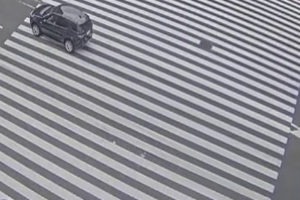

Crosswalk 1 transformed points:
[[          0           0]
 [        299           0]
 [        299         199]
 [          0         199]]
Transformed Crosswalk 2:


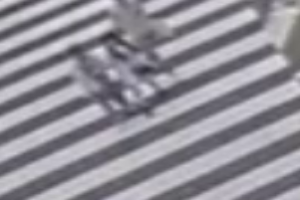

Crosswalk 2 transformed points:
[[          0           0]
 [        299           0]
 [        299         199]
 [          0         199]]
Transformed Crosswalk 3:


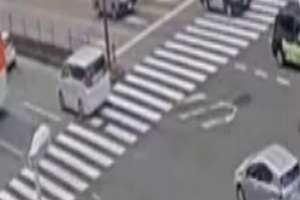

Crosswalk 3 transformed points:
[[ 2.8422e-14  5.6843e-14]
 [        299           0]
 [        299         199]
 [ 2.8422e-14         199]]
Transformed Crosswalk 4:


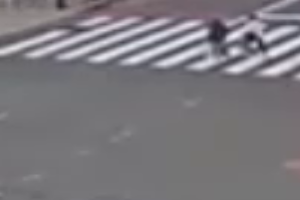

Crosswalk 4 transformed points:
[[ 2.2737e-13           0]
 [        299           0]
 [        299         199]
 [ 2.2737e-13         199]]


In [31]:
class ViewTransformer:
    def __init__(self, source: np.ndarray, target: np.ndarray) -> None:
        source = source.astype(np.float32)
        target = target.astype(np.float32)
        self.m = cv2.getPerspectiveTransform(source, target)

    def transform_points(self, points: np.ndarray) -> np.ndarray:
        if points.size == 0:
            return points

        reshaped_points = points.reshape(-1, 1, 2).astype(np.float32)
        transformed_points = cv2.perspectiveTransform(reshaped_points, self.m)
        return transformed_points.reshape(-1, 2)

# Define multiple source areas for crosswalks
source_areas = [
    np.array([[600, 300], [1200, 300], [1200, 600], [600, 600]]),  # Crosswalk 1
    np.array([[0, 450], [100, 450], [100, 550], [0, 550]]), # Crosswalk 2
    np.array([[150, 150], [450, 150], [450, 250], [150, 250]]),   # Crosswalk 3
    np.array([[600, 100], [700, 100], [700, 200], [600, 200]]),   # Crosswalk 4
    #np.array([[150, 250], [450, 250], [450, 350], [150, 350]]),   # Crosswalk 5
]

# Define a single target area (rectangle) for the perspective transformation
TARGET_WIDTH = 300  # Adjust to your needs
TARGET_HEIGHT = 200  # Adjust to your needs

frame_generator = sv.get_video_frames_generator(source_path=SOURCE_VIDEO_PATH)
frame_iterator = iter(frame_generator)
frame = next(frame_iterator)

target_area = np.array([
    [0, 0],
    [TARGET_WIDTH - 1, 0],
    [TARGET_WIDTH - 1, TARGET_HEIGHT - 1],
    [0, TARGET_HEIGHT - 1],
], dtype=np.float32)

# Assuming you have a 'frame' loaded, for example, from a video or image
#frame = cv2.imread(SOURCE_VIDEO_PATH)

# Process each crosswalk
for i, source in enumerate(source_areas):
    view_transformer = ViewTransformer(source=source, target=target_area)

    # Apply perspective transformation to the entire frame for the current crosswalk
    transformed_frame = cv2.warpPerspective(frame, view_transformer.m, (TARGET_WIDTH, TARGET_HEIGHT))

    # Display the transformed frame (only in Colab)
    from google.colab.patches import cv2_imshow
    print(f"Transformed Crosswalk {i+1}:")
    cv2_imshow(transformed_frame)

    # Example operation: print the transformed points
    print(f"Crosswalk {i+1} transformed points:")
    print(view_transformer.transform_points(source))


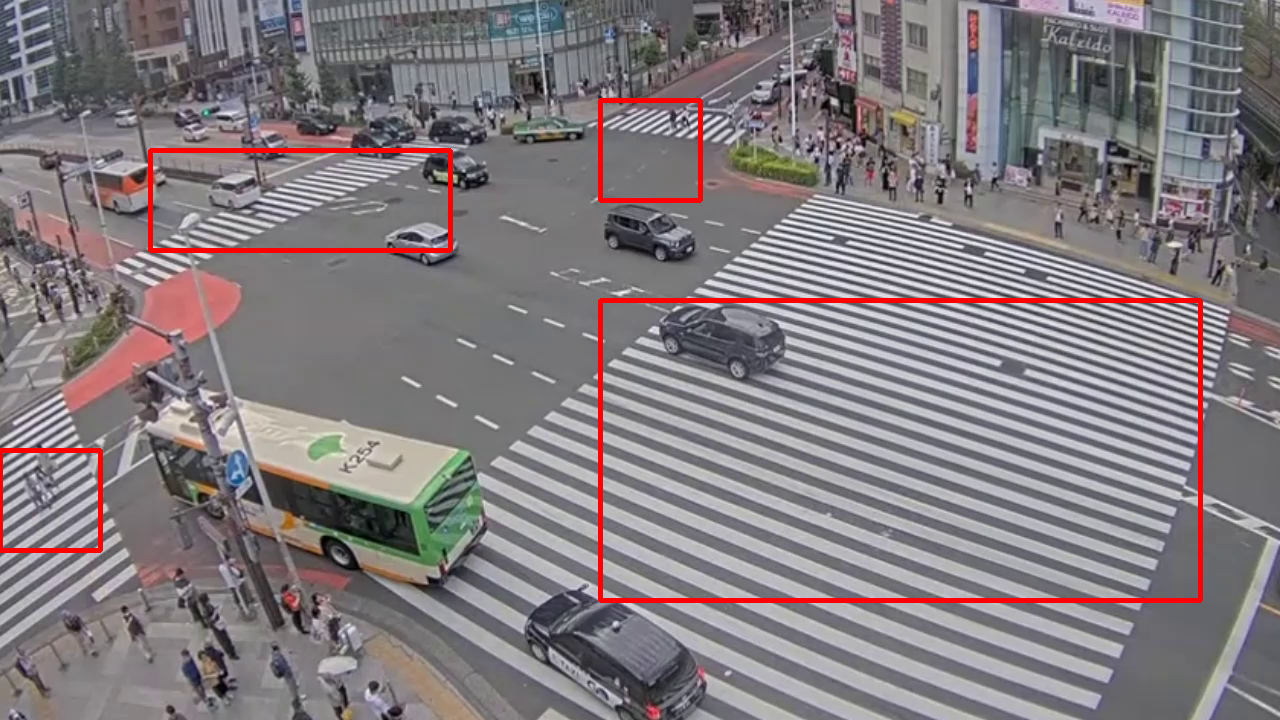

In [35]:
#frame_generator = sv.get_video_frames_generator(source_path=SOURCE_VIDEO_PATH)
#frame_iterator = iter(frame_generator)
#frame = next(frame_iterator)
# Annotate the original frame with the polygon for the current source area
annotated_frame = frame.copy()
color = (0, 0, 255)  # RGB
for src in source_areas:
    cv2.polylines(annotated_frame, [src.astype(np.int32)], isClosed=True, color=color, thickness=4)

# Display the annotated frame
cv2_imshow(annotated_frame)

## Transform Perspective

In [36]:
class ViewTransformer:

    def __init__(self, source: np.ndarray, target: np.ndarray) -> None:
        source = source.astype(np.float32)
        target = target.astype(np.float32)
        self.m = cv2.getPerspectiveTransform(source, target)

    def transform_points(self, points: np.ndarray) -> np.ndarray:
        if points.size == 0:
            return points

        reshaped_points = points.reshape(-1, 1, 2).astype(np.float32)
        transformed_points = cv2.perspectiveTransform(reshaped_points, self.m)
        return transformed_points.reshape(-1, 2)

In [37]:
#view_transformer = ViewTransformer(source=SOURCE, target=TARGET)

In [38]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt") # load the model
results = model.train(data="/content/People-Detection-8/data.yaml", epochs=5)
results = model("/content/drive/MyDrive/Team7dataset/140sDayShinjuku.mp4")


model = YOLO(MODEL_NAME)

video_info = sv.VideoInfo.from_video_path(video_path=SOURCE_VIDEO_PATH)
frame_generator = sv.get_video_frames_generator(source_path=SOURCE_VIDEO_PATH)

# tracer initiation
byte_track = sv.ByteTrack(
    frame_rate=video_info.fps, track_thresh=CONFIDENCE_THRESHOLD
)

# annotators configuration
thickness = sv.calculate_dynamic_line_thickness(
    resolution_wh=video_info.resolution_wh
)
text_scale = sv.calculate_dynamic_text_scale(
    resolution_wh=video_info.resolution_wh
)
bounding_box_annotator = sv.BoundingBoxAnnotator(
    thickness=thickness
)
label_annotator = sv.LabelAnnotator(
    text_scale=text_scale,
    text_thickness=thickness,
    text_position=sv.Position.BOTTOM_CENTER
)
trace_annotator = sv.TraceAnnotator(
    thickness=thickness,
    trace_length=video_info.fps * 2,
    position=sv.Position.BOTTOM_CENTER
)

polygon_zone = sv.PolygonZone(
    polygon=SOURCE,
    frame_resolution_wh=video_info.resolution_wh
)

coordinates = defaultdict(lambda: deque(maxlen=video_info.fps))

# open target video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:

    # loop over source video frame
    for frame in tqdm(frame_generator, total=video_info.total_frames):

        result = model(frame, imgsz=MODEL_RESOLUTION, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(result)

        # filter out detections by class and confidence
        detections = detections[detections.confidence > CONFIDENCE_THRESHOLD]
        detections = detections[detections.class_id != 0]

        # filter out detections outside the zone
        detections = detections[polygon_zone.trigger(detections)]

        # refine detections using non-max suppression
        detections = detections.with_nms(IOU_THRESHOLD)

        # pass detection through the tracker
        detections = byte_track.update_with_detections(detections=detections)

        points = detections.get_anchors_coordinates(
            anchor=sv.Position.BOTTOM_CENTER
        )

        # calculate the detections position inside the target RoI
        points = view_transformer.transform_points(points=points).astype(int)

        # store detections position
        for tracker_id, [_, y] in zip(detections.tracker_id, points):
            coordinates[tracker_id].append(y)

        # format labels
        labels = []

        for tracker_id in detections.tracker_id:
            if len(coordinates[tracker_id]) < video_info.fps / 2:
                labels.append(f"#{tracker_id}")
            else:
                # calculate speed
                coordinate_start = coordinates[tracker_id][-1]
                coordinate_end = coordinates[tracker_id][0]
                distance = abs(coordinate_start - coordinate_end)
                time = len(coordinates[tracker_id]) / video_info.fps
                speed = distance / time * 3.6
                labels.append(f"#{tracker_id} {int(speed)} km/h")

        # annotate frame
        annotated_frame = frame.copy()
        annotated_frame = trace_annotator.annotate(
            scene=annotated_frame, detections=detections
        )
        annotated_frame = bounding_box_annotator.annotate(
            scene=annotated_frame, detections=detections
        )
        annotated_frame = label_annotator.annotate(
            scene=annotated_frame, detections=detections, labels=labels
        )

        # add frame to target video
        sink.write_frame(annotated_frame)

100%|██████████| 21.5M/21.5M [00:00<00:00, 448MB/s]

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/People-Detection-8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

train: Scanning /content/People-Detection-8/train/labels.cache... 15210 images, 1917 backgrounds, 0 corrupt: 100%|██████████| 15210/15210 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/People-Detection-8/train/images/000066_jpg.rf.7af12755c989607af4ff8faf8be1ed1b.jpg: 16 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2007_002387_jpg.rf.b185b9383eb87d476665f67d98e93996.jpg: 13 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2007_002845_jpg.rf.f86d7a1b7e9851bf8201be8dcaf3c8ec.jpg: 23 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2007_003226_jpg.rf.f1f5326d95fecd08c5a9dfdad9259e28.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2008_003526_jpg.rf.4a836fd57d560fc005eab941399b6500.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2008_003598_jpg.rf.df9555297acad95b8d1833b8cb78e7fb.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/People-Detection-8/train/images/2008_003608_jpg.rf.11cb8904ac10f9f5fbaba7b3da1a5364.jpg: 1 duplicate labels removed
t


val: Scanning /content/People-Detection-8/valid/labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/People-Detection-8/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.52G      1.321      1.114      1.231        123        640: 100%|██████████| 951/951 [04:05<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.10it/s]

                   all       1431      10660      0.723      0.594      0.644      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.53G      1.264      1.027      1.189         93        640: 100%|██████████| 951/951 [03:57<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.44it/s]


                   all       1431      10660      0.732      0.561      0.616       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.77G       1.33      1.122      1.227        225        640: 100%|██████████| 951/951 [03:54<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.44it/s]


                   all       1431      10660      0.724      0.516      0.581      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.06G      1.377      1.176      1.257         83        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.49it/s]


                   all       1431      10660      0.708      0.529      0.582      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.87G      1.335      1.132      1.239        110        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.52it/s]


                   all       1431      10660      0.734      0.547      0.612      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.93G      1.293      1.091      1.216         62        640: 100%|██████████| 951/951 [03:54<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.48it/s]


                   all       1431      10660      0.714      0.576      0.631      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.33G      1.263      1.049        1.2        106        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.57it/s]


                   all       1431      10660      0.752      0.578      0.641      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.24G      1.238      1.027      1.191        100        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.58it/s]


                   all       1431      10660      0.761      0.585      0.659      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       4.9G      1.206     0.9903      1.173         86        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.54it/s]


                   all       1431      10660      0.766      0.598      0.666      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.29G      1.195     0.9808      1.167        216        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.52it/s]


                   all       1431      10660      0.784      0.608      0.682      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.66G       1.17     0.9517      1.154        106        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.47it/s]


                   all       1431      10660      0.787      0.617      0.685      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.87G       1.16     0.9359      1.147        125        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.51it/s]


                   all       1431      10660       0.81      0.579      0.648      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.11G      1.141     0.9188      1.139        201        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.49it/s]


                   all       1431      10660      0.802      0.611      0.696      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.99G       1.13     0.9106      1.132         43        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.54it/s]


                   all       1431      10660      0.802      0.619      0.697      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.42G      1.109     0.8871      1.123        155        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.55it/s]


                   all       1431      10660      0.785       0.64      0.709      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.23G      1.101     0.8744      1.118        100        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]


                   all       1431      10660      0.784      0.642      0.712      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.96G      1.093     0.8625      1.114        127        640: 100%|██████████| 951/951 [03:54<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.45it/s]


                   all       1431      10660      0.804      0.635      0.716      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.82G      1.081     0.8525      1.108        124        640: 100%|██████████| 951/951 [03:54<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.52it/s]


                   all       1431      10660      0.817      0.621      0.718      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.96G      1.066     0.8398      1.099        103        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.51it/s]


                   all       1431      10660      0.808      0.638      0.717      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.11G      1.061     0.8289      1.094        113        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.49it/s]


                   all       1431      10660        0.8      0.654      0.734      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.03G       1.05     0.8211      1.091         81        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.58it/s]


                   all       1431      10660      0.805      0.651      0.732      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.01G      1.042     0.8128      1.087        160        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.58it/s]


                   all       1431      10660      0.804      0.654      0.735      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.45G      1.035      0.804      1.083        135        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.54it/s]


                   all       1431      10660      0.812      0.661      0.738       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.71G       1.02       0.79      1.076        109        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.53it/s]

                   all       1431      10660      0.808      0.668      0.745      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.81G      1.016      0.787      1.077        105        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.37it/s]


                   all       1431      10660       0.82      0.664      0.747      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.54G      1.018     0.7861      1.077         93        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.52it/s]


                   all       1431      10660      0.815      0.668      0.749      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.48G      1.002     0.7682      1.065        130        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.54it/s]


                   all       1431      10660      0.812      0.668      0.744       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.03G     0.9927     0.7568      1.061        132        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.57it/s]


                   all       1431      10660      0.812      0.675      0.754      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       4.9G      0.988     0.7553       1.06         75        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.61it/s]


                   all       1431      10660      0.805      0.679       0.75      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.54G     0.9855     0.7499      1.058         69        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.57it/s]


                   all       1431      10660      0.804      0.687      0.757       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.61G     0.9758     0.7401      1.053        145        640: 100%|██████████| 951/951 [03:53<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.56it/s]


                   all       1431      10660       0.82      0.681       0.76      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.59G     0.9732     0.7374      1.051        164        640: 100%|██████████| 951/951 [03:54<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.39it/s]


                   all       1431      10660      0.812      0.685      0.761      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.94G      0.971     0.7324      1.049        100        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.61it/s]


                   all       1431      10660      0.818      0.685      0.763        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       5.7G     0.9591     0.7244      1.046         96        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]


                   all       1431      10660      0.816      0.689      0.767      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.97G     0.9479     0.7124       1.04        112        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.59it/s]


                   all       1431      10660      0.822       0.69      0.768      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       5.9G     0.9486     0.7096      1.039         84        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.59it/s]


                   all       1431      10660       0.82      0.689      0.768      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.64G     0.9412     0.7038      1.037        102        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.57it/s]

                   all       1431      10660       0.83      0.689      0.771       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       4.8G     0.9338     0.6999      1.033         89        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.53it/s]


                   all       1431      10660      0.822      0.694       0.77      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.16G     0.9283     0.6915      1.031        108        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.52it/s]


                   all       1431      10660      0.834      0.692      0.775      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.78G     0.9262     0.6885      1.029        153        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]

                   all       1431      10660      0.824      0.699      0.777      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.71G     0.9195       0.68      1.025        101        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.62it/s]


                   all       1431      10660      0.827      0.694      0.775      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.43G     0.9191     0.6796      1.025         95        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.53it/s]

                   all       1431      10660      0.827      0.698      0.777      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.07G     0.9126      0.671      1.022        142        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.62it/s]

                   all       1431      10660      0.832      0.697      0.778       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.22G     0.9084     0.6691      1.022         83        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.57it/s]


                   all       1431      10660      0.825      0.702      0.779      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.23G     0.8949      0.661      1.015        114        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]


                   all       1431      10660      0.831      0.693      0.775      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       5.5G      0.896     0.6567      1.013        132        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.58it/s]


                   all       1431      10660       0.83      0.694      0.778      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.45G     0.8874       0.65      1.007        135        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.56it/s]


                   all       1431      10660      0.831        0.7       0.78      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.42G     0.8855       0.65      1.009         54        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.55it/s]

                   all       1431      10660      0.823      0.705      0.782      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.14G     0.8828     0.6435      1.007         77        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]

                   all       1431      10660       0.83        0.7      0.782      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.63G     0.8753     0.6399      1.003        133        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.53it/s]

                   all       1431      10660      0.833      0.699      0.783       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.38G     0.8732     0.6333      1.005        115        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.58it/s]

                   all       1431      10660      0.831      0.702      0.784      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.33G     0.8704     0.6333      1.003        100        640: 100%|██████████| 951/951 [03:54<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]

                   all       1431      10660      0.835      0.701      0.785      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       5.1G     0.8622      0.625      0.998        217        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.61it/s]

                   all       1431      10660      0.829      0.708      0.785      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.88G      0.859     0.6205     0.9983        135        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]

                   all       1431      10660      0.825      0.711      0.787      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.34G     0.8573     0.6174     0.9949        151        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.55it/s]


                   all       1431      10660      0.827      0.711      0.787      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.28G     0.8525     0.6145     0.9961        100        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.62it/s]

                   all       1431      10660      0.832      0.709      0.787      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       5.9G     0.8446     0.6067     0.9917        123        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.54it/s]

                   all       1431      10660      0.832      0.711      0.789      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.87G     0.8448     0.6041     0.9903        117        640: 100%|██████████| 951/951 [03:55<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.47it/s]

                   all       1431      10660      0.835       0.71       0.79       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       5.4G     0.8348     0.5973     0.9869         59        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.47it/s]

                   all       1431      10660      0.833      0.713      0.791      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.95G     0.8302     0.5956     0.9849        154        640: 100%|██████████| 951/951 [03:53<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.62it/s]


                   all       1431      10660      0.835      0.713      0.791      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.47G     0.8325      0.593     0.9849         87        640: 100%|██████████| 951/951 [03:53<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]

                   all       1431      10660      0.834      0.716      0.792      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.43G     0.8215     0.5865     0.9813        105        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.66it/s]


                   all       1431      10660      0.834      0.716      0.793      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.57G     0.8208     0.5847     0.9815         99        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.63it/s]

                   all       1431      10660      0.836      0.718      0.794      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.72G     0.8191     0.5817       0.98        101        640: 100%|██████████| 951/951 [03:53<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.63it/s]

                   all       1431      10660      0.835      0.718      0.795      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.18G     0.8102     0.5737     0.9774         58        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.65it/s]

                   all       1431      10660      0.838      0.719      0.796      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.45G     0.8108     0.5733     0.9767        182        640: 100%|██████████| 951/951 [03:55<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.63it/s]

                   all       1431      10660       0.84      0.718      0.797      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.66G     0.8037     0.5667     0.9708        108        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.61it/s]

                   all       1431      10660       0.84      0.715      0.797      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.53G     0.7988     0.5674     0.9723        238        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.54it/s]

                   all       1431      10660       0.84      0.716      0.796      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.36G     0.7964     0.5615     0.9695         83        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.57it/s]

                   all       1431      10660       0.84      0.717      0.797       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.95G     0.7921     0.5582     0.9689         90        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.59it/s]

                   all       1431      10660      0.839      0.717      0.797       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.84G     0.7895     0.5523     0.9666        152        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.59it/s]

                   all       1431      10660       0.84      0.719      0.798       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.47G     0.7823     0.5479     0.9635         64        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.51it/s]

                   all       1431      10660      0.839      0.718      0.798      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.33G     0.7787     0.5467     0.9633        136        640: 100%|██████████| 951/951 [03:54<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.56it/s]

                   all       1431      10660      0.843      0.716      0.798      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.91G     0.7743     0.5412     0.9597         86        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.55it/s]

                   all       1431      10660      0.844      0.716      0.798      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.03G     0.7708     0.5402     0.9601        192        640: 100%|██████████| 951/951 [03:53<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.56it/s]

                   all       1431      10660      0.845      0.716      0.799      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.54G     0.7691     0.5367     0.9579        195        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.56it/s]

                   all       1431      10660      0.844      0.717      0.799      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.72G     0.7592     0.5322     0.9564         85        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.55it/s]

                   all       1431      10660      0.844      0.718      0.799      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.26G     0.7588     0.5274     0.9552         58        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]

                   all       1431      10660      0.841       0.72      0.799      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.38G     0.7541      0.525     0.9544         76        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.59it/s]

                   all       1431      10660      0.839      0.721      0.799      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.93G     0.7493      0.519     0.9513        163        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.63it/s]

                   all       1431      10660      0.843       0.72        0.8      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.43G      0.749     0.5205     0.9516         86        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.63it/s]

                   all       1431      10660      0.843       0.72        0.8      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.76G     0.7436     0.5137     0.9489        153        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.58it/s]

                   all       1431      10660      0.843       0.72        0.8      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.49G     0.7344     0.5091     0.9475         52        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.59it/s]

                   all       1431      10660      0.843      0.719      0.801      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.97G     0.7326     0.5076     0.9464        124        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.59it/s]

                   all       1431      10660      0.843      0.721      0.801      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.18G     0.7283      0.504     0.9426        194        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.55it/s]

                   all       1431      10660      0.843       0.72        0.8      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.71G     0.7254     0.5006     0.9424         90        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.56it/s]

                   all       1431      10660      0.841      0.721      0.801      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.39G     0.7202     0.4945     0.9374        163        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.56it/s]

                   all       1431      10660      0.843       0.72      0.801      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.03G     0.7182     0.4943     0.9379        123        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.57it/s]

                   all       1431      10660      0.838      0.723      0.801      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.59G     0.7161     0.4912     0.9378         82        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.61it/s]

                   all       1431      10660      0.838      0.724      0.802      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.08G     0.7141     0.4866     0.9369        111        640: 100%|██████████| 951/951 [03:53<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.59it/s]

                   all       1431      10660       0.84      0.722      0.802      0.559


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.17G     0.6626     0.4213     0.9103         42        640: 100%|██████████| 951/951 [03:52<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.57it/s]

                   all       1431      10660      0.841      0.722      0.802      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.28G     0.6514      0.407     0.9032        107        640: 100%|██████████| 951/951 [03:50<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.61it/s]

                   all       1431      10660      0.843      0.722      0.802       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.92G     0.6432     0.4023     0.9028         47        640: 100%|██████████| 951/951 [03:50<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.64it/s]

                   all       1431      10660      0.845      0.722      0.803       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       5.2G        inf     0.3986     0.9007         37        640: 100%|██████████| 951/951 [03:50<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.64it/s]

                   all       1431      10660      0.844      0.722      0.803      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.73G     0.6321     0.3938     0.8977         37        640: 100%|██████████| 951/951 [03:50<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]

                   all       1431      10660      0.845      0.721      0.803      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.64G     0.6259     0.3902      0.895         65        640: 100%|██████████| 951/951 [03:50<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.57it/s]

                   all       1431      10660      0.845      0.721      0.803      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.45G     0.6228     0.3872     0.8944         92        640: 100%|██████████| 951/951 [03:50<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.62it/s]

                   all       1431      10660      0.847      0.719      0.804      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.61G     0.6175     0.3812     0.8907         45        640: 100%|██████████| 951/951 [03:50<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.62it/s]

                   all       1431      10660      0.846      0.721      0.804      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.36G     0.6103     0.3791     0.8907         69        640: 100%|██████████| 951/951 [03:50<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.68it/s]

                   all       1431      10660      0.846      0.723      0.805      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.33G     0.6105     0.3789     0.8903         34        640: 100%|██████████| 951/951 [03:50<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:09<00:00,  4.62it/s]

                   all       1431      10660      0.847      0.722      0.805      0.563



100 epochs completed in 6.794 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.45it/s]


                   all       1431      10660      0.847      0.721      0.805      0.563
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train



FileNotFoundError: /content/drive/MyDrive/Team7dataset/140sDayShinjuku.mp4 does not exist

In [ ]:
# prompt: tensorboard

%load_ext tensorboard
%tensorboard --logdir runs/detect/train


In [41]:
# Load the best model
model = YOLO("/content/drive/MyDrive/Team7dataset/Team7Shared/person_best2.pt")

# Run validation on the model (using the validation data)
results = model.val()


Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/People-Detection-8/valid/labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/People-Detection-8/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:21<00:00,  4.27it/s]


                   all       1431      10660      0.847      0.722      0.805      0.564
Speed: 0.2ms preprocess, 6.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val3


In [43]:
#model.train(data="/content/drive/MyDrive/Team7dataset/Team7Shared/data.yaml", epochs=32, imgsz=480, name="people_detection_model")

# Test the model on a new image
results = model.predict("/content/drive/MyDrive/Team7dataset/Team7Shared/140sDayShinjuku.mp4", imgsz=320, conf=0.5, iou=0.5, batch=16)

# Display results
results.show()

# Save results
results.save("/content/drive/MyDrive/Team7dataset/DayShinjuku_result.mp4")




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/4225) /content/drive/MyDrive/Team7dataset/Team7Shared/140sDayShinjuku.mp4: 192x320 (no detections), 4.6ms
video 1/1 (frame 2/4225) /content/drive/MyDrive/Team7dataset/Team7Shared/140sDayShinjuku.mp4: 192x320 (no detections), 4.6ms
video 1/1 (frame 3/4225) /content/drive/MyDrive/Team7dataset/Team7Shared/140sDayShinjuku.mp4: 192x320 (no detections), 4.6ms
video 1/1 (frame 4/4225) /content/drive/MyDrive/Team7dataset/Team7Shared/140sDayS

AttributeError: 'list' object has no attribute 'show'